<a href="https://colab.research.google.com/github/somaeg/CodingTest_Sql_LeetCode/blob/main/house_prices_advanced_regression_techniques_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle API
- 데이터 다운로드

In [894]:
!pip install kaggle

### 데이터 가져오기

In [ ]:
from google.colab import files

uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions list

ref                                                                               deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/llm-detect-ai-generated-text                  2024-01-22 23:59:00  Featured          $110,000       1891           False  
https://www.kaggle.com/competitions/stanford-ribonanza-rna-folding                2023-12-07 23:59:00  Research          $100,000        709           False  
https://www.kaggle.com/competitions/optiver-trading-at-the-close                  2023-12-20 23:59:00  Featured          $100,000       3673           False  
https://www.kaggle.com/competitions/nfl-big-data-bowl-2024                        2024-01-08 23:59:00  Analytics         $100,000          0           False  
https://www.kaggle.com/competitions/blood-vess

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/house-prices-advanced-regression-techniques.zip') # 압축을 해제할 '/파일경로/파일명.zip'
zip_file.extractall('/content')

In [ ]:
!ls

catboost_info					 kaggle			The_last_regression.csv
data_description.txt				 sample_data		train.csv
drive						 sample_submission.csv
house-prices-advanced-regression-techniques.zip  test.csv


###구글 마운트 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###데이터 불러오기

In [896]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [897]:
print('train data :', train.shape)
print('test data :', test.shape)

train data : (1460, 81)
test data : (1459, 80)


# 데이터 전처리

In [898]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [899]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### 컬럼들 데이터 타입 분류

In [ ]:
# train 문자형 컬럼
character_columns_train = train.select_dtypes(include='object')
character_columns_train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [900]:
# train int형 컬럼
int_columns_train = train.select_dtypes(include='int')
int_columns_train.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [901]:
# train float 컬럼
float_columns_train = train.select_dtypes(include='float')
float_columns_train.columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [902]:
# test 문자형 컬럼
character_columns_test = test.select_dtypes(include='object')
character_columns_test.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [903]:
# test int형 컬럼
int_columns_test = test.select_dtypes(include='int')
int_columns_test.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [904]:
# test float 컬럼
float_columns_test = test.select_dtypes(include='float')
float_columns_test.columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

###변수들 분류

#####위치 및 특징


> MSSubClass,
MSZoning,
LotFrontage,
LotArea,
Street,
Alley,
LotShape,
LandContour,
Utilities,
LotConfig,
LandSlope,
Neighborhood,
Condition1,
Condition2,
BldgType,
HouseStyle

#####건물구조


> OverallQual,
OverallCond,
YearBuilt,
YearRemodAdd,
RoofStyle,
RoofMatl,
Exterior1st,
Exterior2nd,
MasVnrType,
MasVnrArea,
ExterQual,
ExterCond,
Foundation

#####지하실


> BsmtQual,
BsmtCond,
BsmtExposure,
BsmtFinType1,
BsmtFinSF1,
BsmtFinType2,
BsmtFinSF2,
BsmtUnfSF,
TotalBsmtSF

#####냉난방시설및 공기청


> Heating,
HeatingQC,
CentralAir

#####전기 및 인테리어 특징


>Electrical,
1stFlrSF,
2ndFlrSF,
LowQualFinSF,
GrLivArea,
BsmtFullBath,
BsmtHalfBath,
FullBath,
HalfBath,
Bedroom,
Kitchen,
KitchenQual,
TotRmsAbvGrd,
Functional

#####난로


> Fireplaces,
FireplaceQu

#####차고


> GarageType,
GarageYrBlt,
GarageFinish,
GarageCars,
GarageArea,
GarageQual,
GarageCond

#####외부 특징


> PavedDrive,
WoodDeckSF,
OpenPorchSF,
EnclosedPorch,
3SsnPorch,
ScreenPorch,
PoolArea,
PoolQC,
Fence

#####기타


> MiscFeature,
MiscVal

#####판매정보


> MoSold,
YrSold,
SaleType,
SaleCondition






















###타겟 데이터 분포
- 정규화 필요

The value of mu before log transformation is: 180921.19589041095
The value of sigma before log transformation is: 79415.29188606751


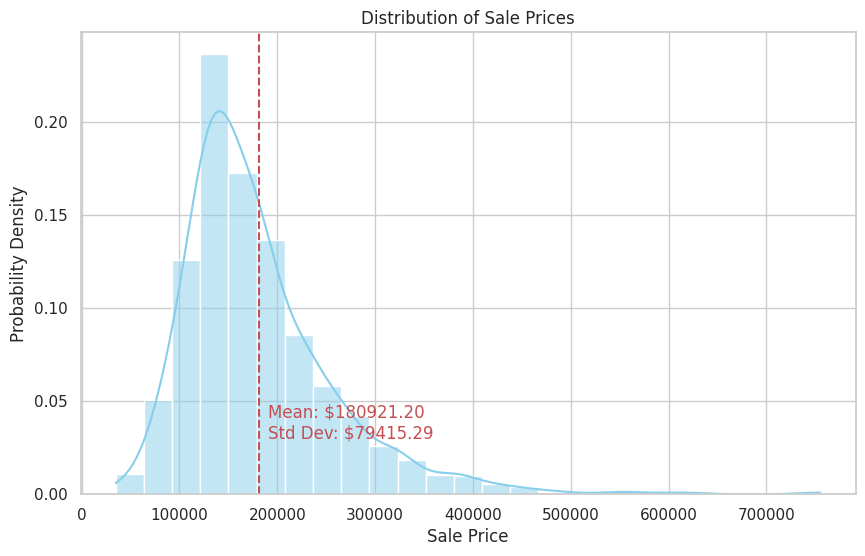

In [905]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(train['SalePrice'], bins=25, kde=True, color='skyblue', stat='probability')

plt.axvline(mu, color='r', linestyle='--')

plt.text(mu + 10000, 0.03, f'Mean: ${mu:.2f}\nStd Dev: ${sigma:.2f}', rotation=0, color='r')

plt.xlabel('Sale Price')
plt.ylabel('Probability Density')
plt.title('Distribution of Sale Prices')

plt.show()

#### 로그함수를 이용한 종속변수 변환

The value of mu after log transformation is: 2.566328531215135
The value of sigma after log transformation is: 0.03064954108320052


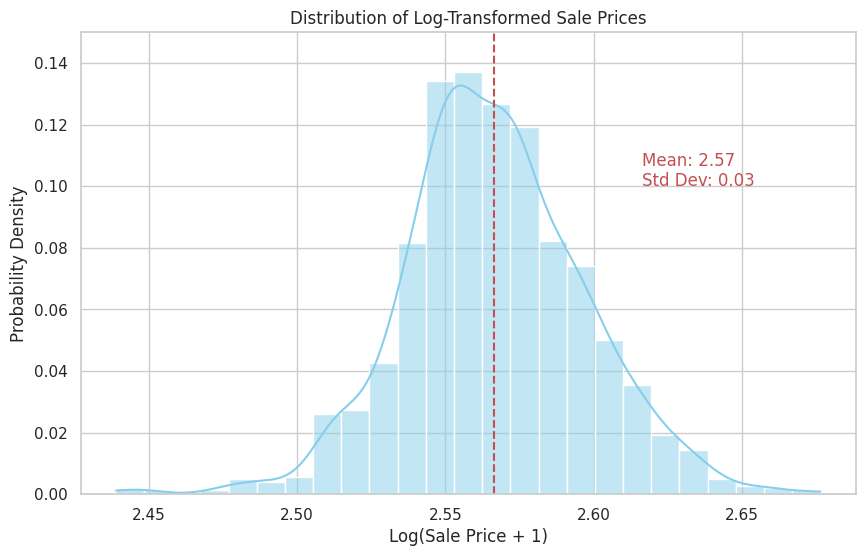

In [907]:
import numpy as np
from scipy.stats import norm

train["SalePrice"] = np.log1p(train["SalePrice"])

(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu after log transformation is:", mu)
print("The value of sigma after log transformation is:", sigma)

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(train['SalePrice'], bins=25, kde=True, color='skyblue', stat='probability')

plt.axvline(mu, color='r', linestyle='--')

plt.text(mu + 0.05, 0.1, f'Mean: {mu:.2f}\nStd Dev: {sigma:.2f}', rotation=0, color='r')

plt.xlabel('Log(Sale Price + 1)')
plt.ylabel('Probability Density')
plt.title('Distribution of Log-Transformed Sale Prices')

plt.ylim(0, 0.15)

plt.show()

###상관관계

####상관계수를 이용하여 영향력이 있는 top10의 변수선택
- 종목별로 그룹지어 그룹간의 영향도 확인.

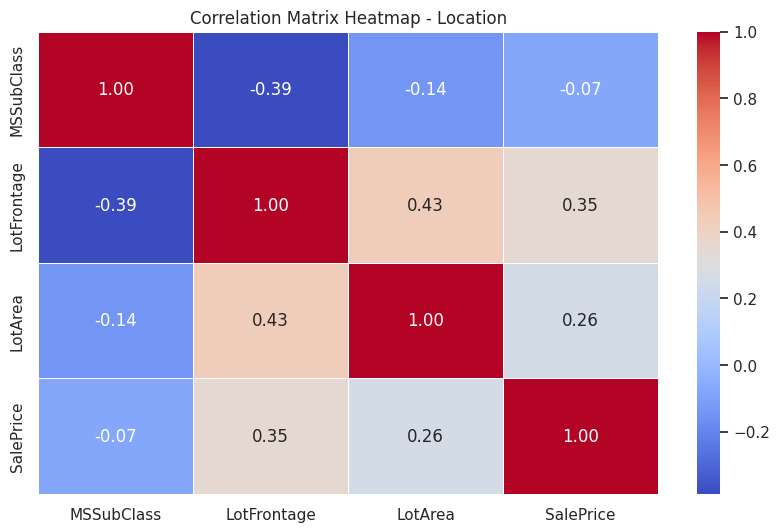

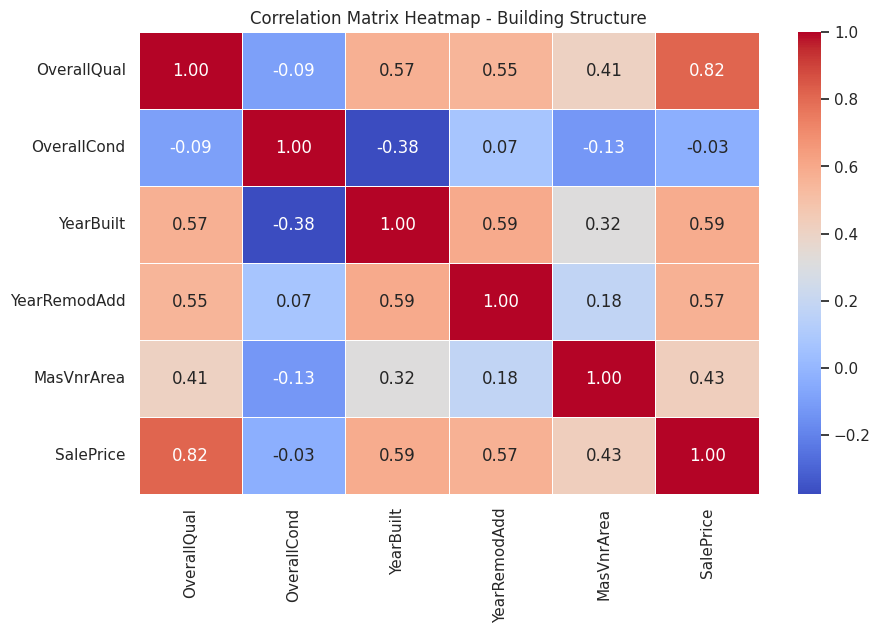

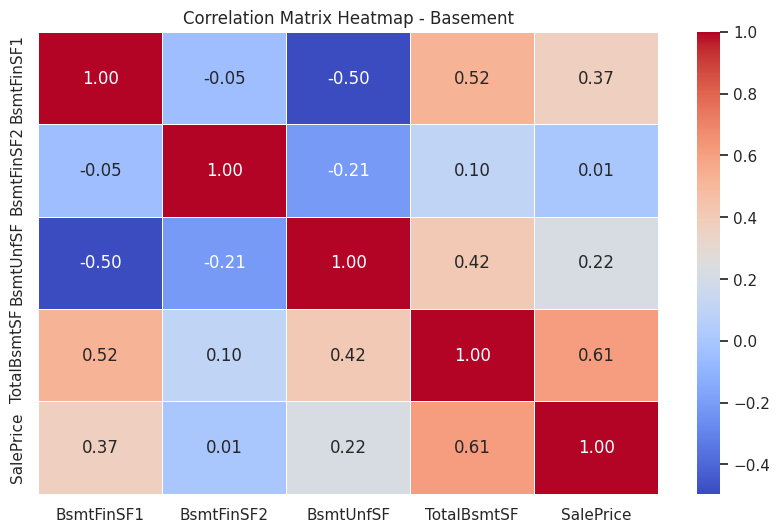

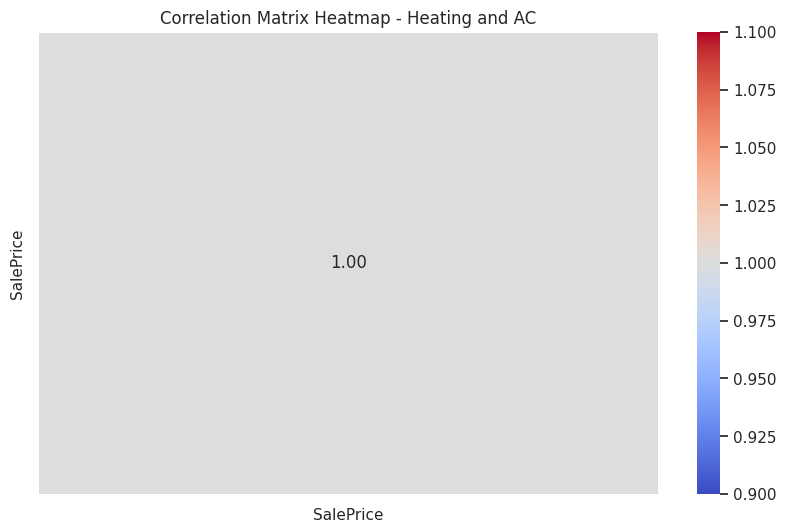

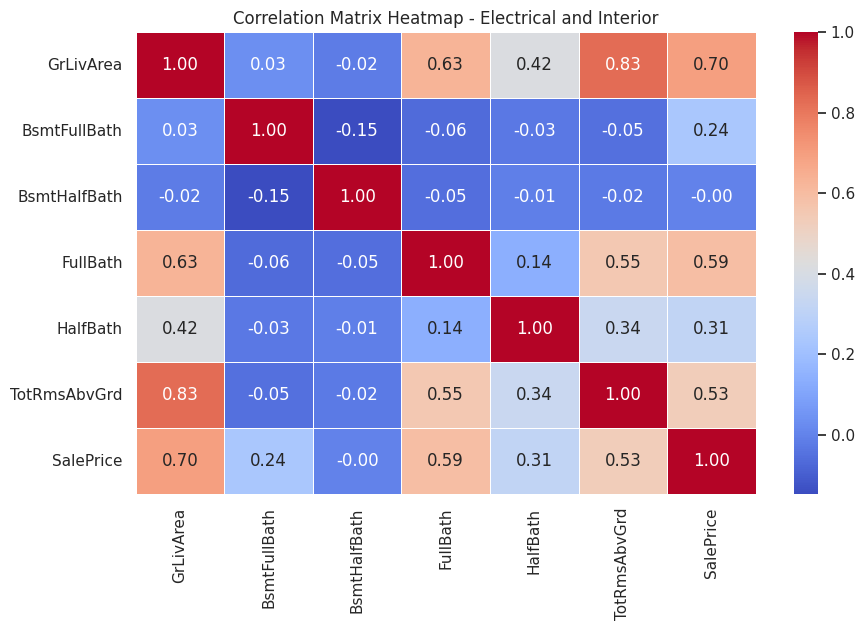

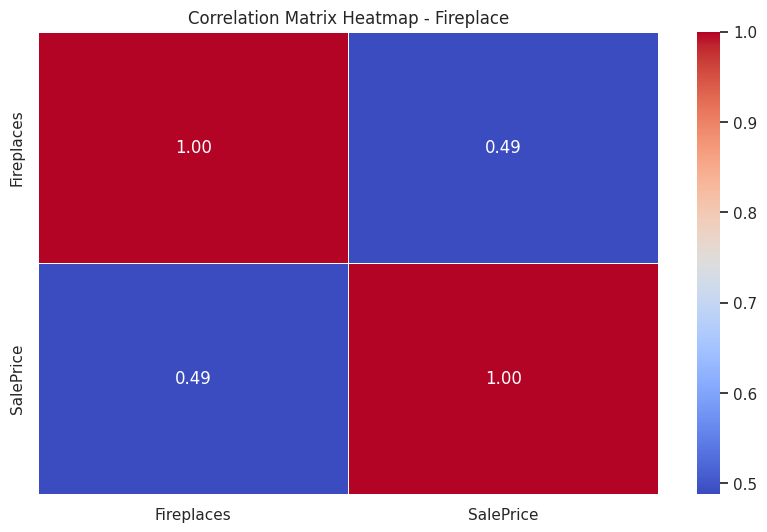

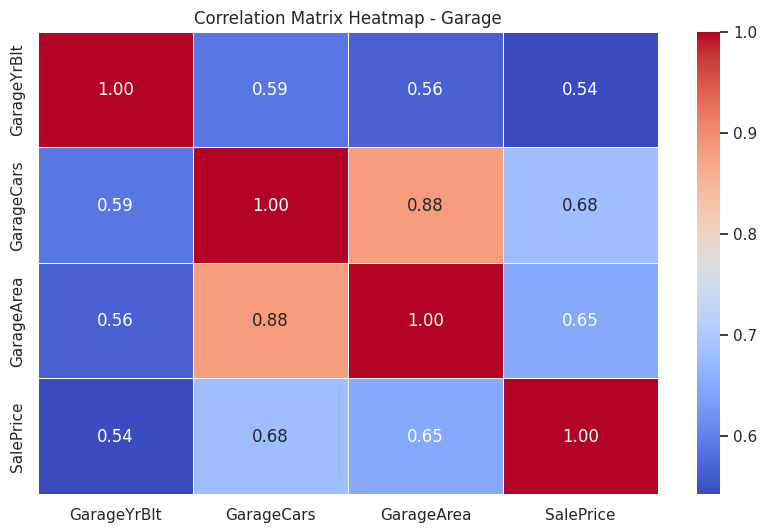

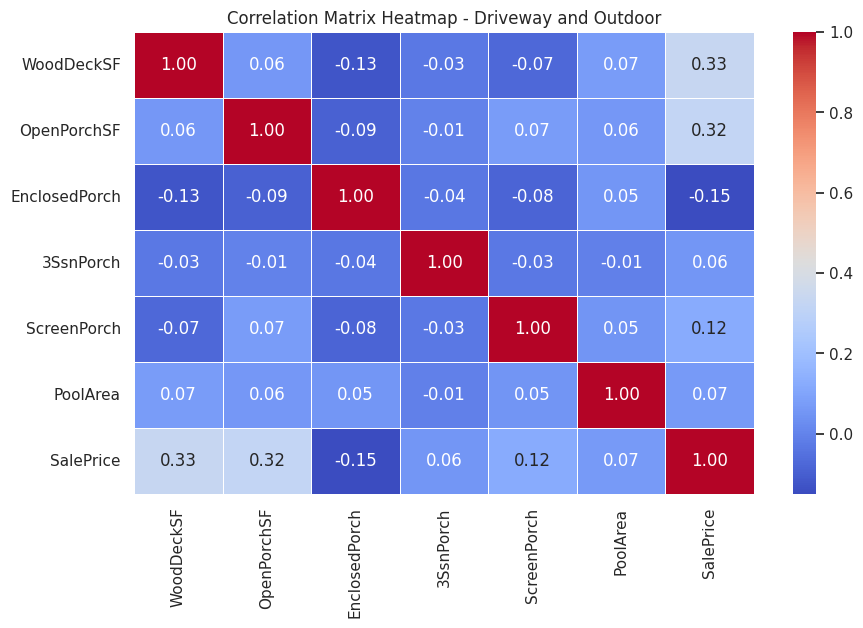

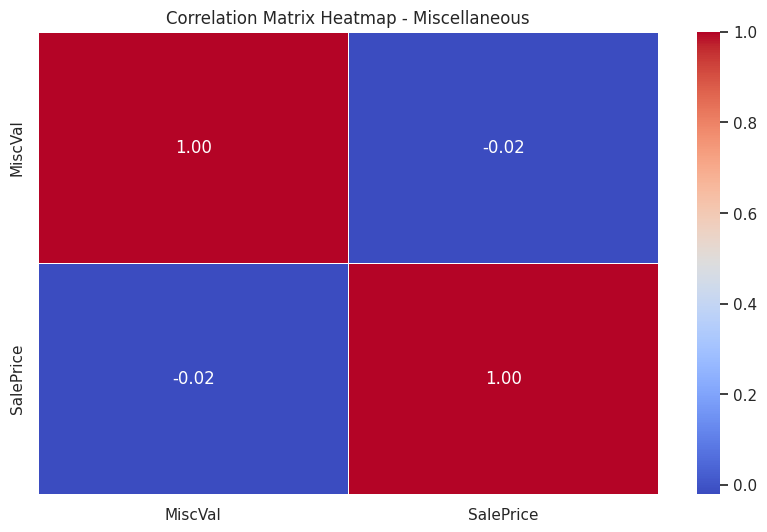

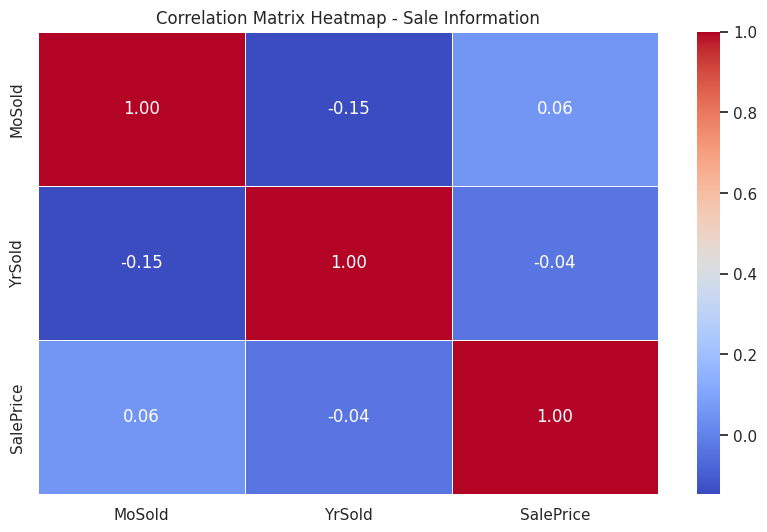

In [994]:
# 비슷한 성향을 띄는 변수들끼리 그룹화.
location_columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle']
building_structure_columns = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation']
basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
heating_ac_columns = ['Heating', 'HeatingQC', 'CentralAir']
electrical_interior_columns = ['Electrical', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional']
fireplace_columns = ['Fireplaces', 'FireplaceQu']
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
driveway_outdoor_columns = ['PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence']
miscellaneous_columns = ['MiscFeature', 'MiscVal']
sale_information_columns = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition']

categories = [
    location_columns,
    building_structure_columns,
    basement_columns,
    heating_ac_columns,
    electrical_interior_columns,
    fireplace_columns,
    garage_columns,
    driveway_outdoor_columns,
    miscellaneous_columns,
    sale_information_columns
]

category_names = [
    'Location',
    'Building Structure',
    'Basement',
    'Heating and AC',
    'Electrical and Interior',
    'Fireplace',
    'Garage',
    'Driveway and Outdoor',
    'Miscellaneous',
    'Sale Information'
]

# 상관계수를 히트맵으로 표현
for i, (category_columns, category_name) in enumerate(zip(categories, category_names)):

    all_columns_in_category = category_columns + ['SalePrice']

    selected_data_in_category = train[all_columns_in_category]

    correlation_matrix_in_category = selected_data_in_category.corr(numeric_only=True)

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix_in_category, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title(f'Correlation Matrix Heatmap - {category_name}')
    plt.show()

#### 종속변수와 상관계수가 높은 상위 10개의 변수 추출(문자형 제외)

In [911]:
correlation_matrix = train.corr()
top_correlated_features = correlation_matrix['SalePrice'].abs().sort_values(ascending=False).head(11)

print(f"Dependent Variable: SalePrice\n")
print("Top Ten Correlated Features:")
print(top_correlated_features)

Dependent Variable: SalePrice

Top Ten Correlated Features:
SalePrice       1.000000
OverallQual     0.815005
GrLivArea       0.697001
GarageCars      0.680156
GarageArea      0.649601
TotalBsmtSF     0.609138
FullBath        0.593950
1stFlrSF        0.593533
YearBuilt       0.587947
YearRemodAdd    0.566811
GarageYrBlt     0.542620
Name: SalePrice, dtype: float64


<ipython-input-911-6b2d0d8682d7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


### ANOVA 분석

####ANOVA 분석을 통한 유의미한 문자형변수 선택

In [913]:
from scipy.stats import f_oneway

categorical_columns = train.select_dtypes(include=['object']).columns.tolist()

categorical_data = train[categorical_columns + ['SalePrice']]

significance_level = 0.05

significant_anova_results = {}
for column in categorical_columns:
    groups = [categorical_data[categorical_data[column] == category]['SalePrice'] for category in categorical_data[column].unique()]
    f_stat, p_value = f_oneway(*groups)

    if p_value < significance_level:
        significant_anova_results[column] = {'F-statistic': f_stat, 'p-value': p_value}

for column, result in significant_anova_results.items():
    print(f"ANOVA results for {column}:")
    print(f"F-statistic: {result['F-statistic']}, p-value: {result['p-value']}")
    print()



/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


ANOVA results for MSZoning:
F-statistic: 80.29669070737123, p-value: 1.2654376638353787e-61

ANOVA results for Street:
F-statistic: 5.0375031301209185, p-value: 0.024953692978310616

ANOVA results for LotShape:
F-statistic: 46.620291299927956, p-value: 9.104677844016576e-29

ANOVA results for LandContour:
F-statistic: 12.606416738306168, p-value: 3.8814677510900826e-08

ANOVA results for LotConfig:
F-statistic: 8.67714627051679, p-value: 6.392641037831972e-07

ANOVA results for Neighborhood:
F-statistic: 78.67135495494898, p-value: 3.088013144963897e-241

ANOVA results for Condition1:
F-statistic: 8.083711819775788, p-value: 9.989570155659847e-11

ANOVA results for Condition2:
F-statistic: 2.5401570472377024, p-value: 0.013381880883342091

ANOVA results for BldgType:
F-statistic: 15.155013257615687, p-value: 3.818448114503314e-12

ANOVA results for HouseStyle:
F-statistic: 23.56584134503965, p-value: 1.7385252129695873e-30

ANOVA results for RoofStyle:
F-statistic: 12.711563927738066, 

#### ANOVA분석을 통하여 유의미한뜻이 있는 문자형 변수만 추출

In [ ]:
significant_columns = list(significant_anova_results.keys())
print("Column names with significant differences:", significant_columns)
len(significant_columns)

Column names with significant differences: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


25

### 선택한 변수로 새로운 데이터생성
- 상관계수와 ANOVA를 통해 추출한 컬럼으로 새로운 데이터 생성

In [928]:
selected_columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd',
                    'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                    'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'
                    ]

new_train = train[selected_columns]

In [929]:
selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd',
                    'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                    'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'
                    ]

new_test = test[selected_columns]

In [930]:
new_train.shape

(1460, 35)

In [931]:
new_test.shape

(1459, 34)

### 결측치 확인

#### new_train 데이터 확인

In [932]:
missing_data = pd.DataFrame(new_train.isnull().sum(), columns=['Missing Values'])

missing_columns = missing_data[missing_data['Missing Values'] > 0]

print("Columns with Missing Values:")
print(missing_columns)

Columns with Missing Values:
             Missing Values
GarageYrBlt              81


#### new_test 데이터 확인

In [933]:
missing_data = pd.DataFrame(new_test.isnull().sum(), columns=['Missing Values'])

missing_columns = missing_data[missing_data['Missing Values'] > 0]

print("Columns with Missing Values:")
print(missing_columns)

Columns with Missing Values:
             Missing Values
GarageCars                1
GarageArea                1
TotalBsmtSF               1
GarageYrBlt              78
MSZoning                  4
Exterior1st               1
Exterior2nd               1
KitchenQual               1
Functional                2
SaleType                  1


#### GarageYrBlt 컬럼삭제
- 결측치가 너무 많고 범주형 데이터이므로 삭제

In [934]:
new_train.drop(['GarageYrBlt'], axis = 1, inplace =True)
new_test.drop(['GarageYrBlt'], axis = 1, inplace =True)

<ipython-input-934-0d0047ff44d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train.drop(['GarageYrBlt'], axis = 1, inplace =True)
<ipython-input-934-0d0047ff44d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test.drop(['GarageYrBlt'], axis = 1, inplace =True)


In [935]:
# 나머지는 해당 컬럼의 앞에것을 선택
# 평균으로 채울시 해당 안채워지는것들이 생김
new_test = new_test.fillna(method = 'ffill')
new_test.isnull().sum().sum()

0

###IQR을 이용한 이상치 제거.

In [936]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def remove_outliers_iqr(data, columns_to_exclude=None):

    data_cleaned = data.copy()

    numeric_columns = data_cleaned.select_dtypes(include=['number']).columns

    for column in numeric_columns:
        if columns_to_exclude is None or column not in columns_to_exclude:

            Q1 = data_cleaned[column].quantile(0.25)
            Q3 = data_cleaned[column].quantile(0.75)

            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

    return data_cleaned


#### 이상치를 제거하기전 Box-plot

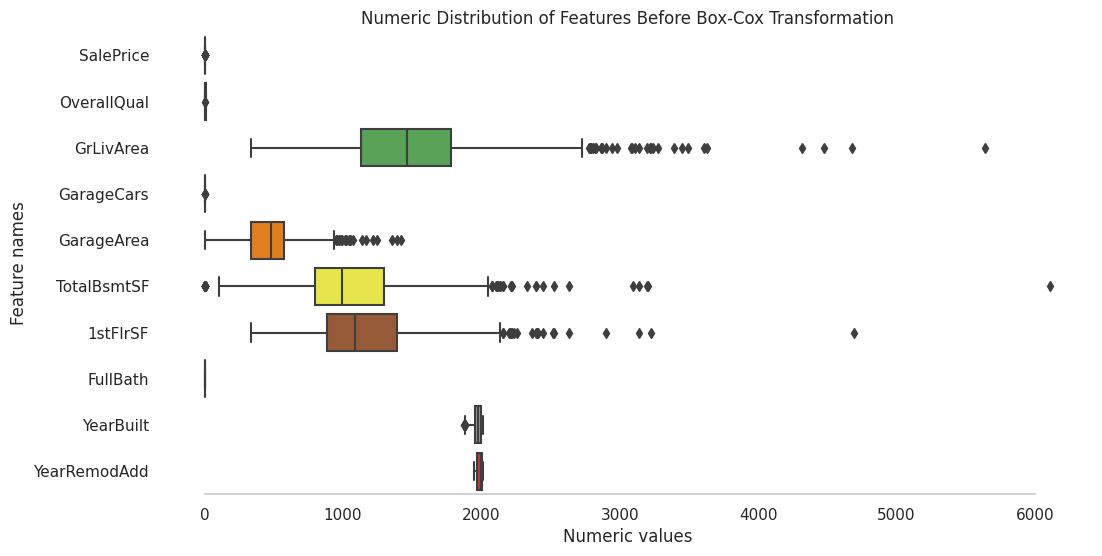

In [937]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=new_train, orient='h', palette='Set1')
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features Before Box-Cox Transformation")
sns.despine(trim=True, left=True)

#### 이상치를 제거한 후 Box-plot

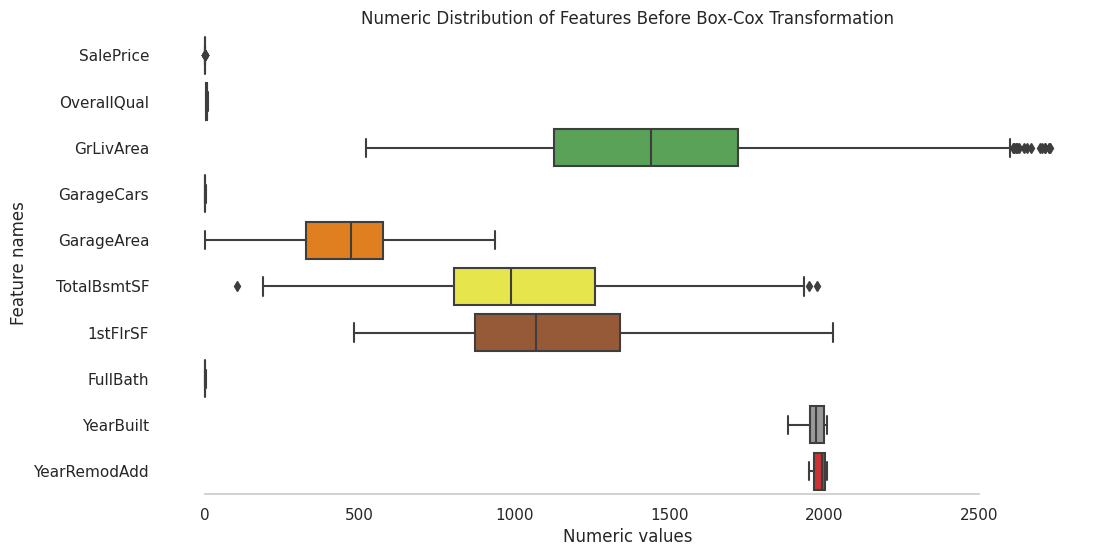

In [938]:
new_train = remove_outliers_iqr(new_train)

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=new_train, orient='h', palette='Set1')
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features Before Box-Cox Transformation")
sns.despine(trim=True, left=True)

In [939]:
new_train.shape

(1324, 34)

###VIF 확인

In [941]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def detect_high_vif_variables(data, threshold_vif=10):
    numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns
    X = data[numeric_columns]

    if X.isnull().any().any():
        X = X.dropna()

    target_variable = "SalePrice"
    X = X.drop(columns=[target_variable])

    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    high_vif_variables = vif_data[vif_data["VIF"] >= threshold_vif]["Variable"].tolist()

    return high_vif_variables

#### 공분산성 높은 컬럼 확인

In [942]:
high_vif_vars = detect_high_vif_variables(new_train)
high_vif_vars

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd']

#### 공분산성 높은 컬럼들끼리의 상관계수 파악

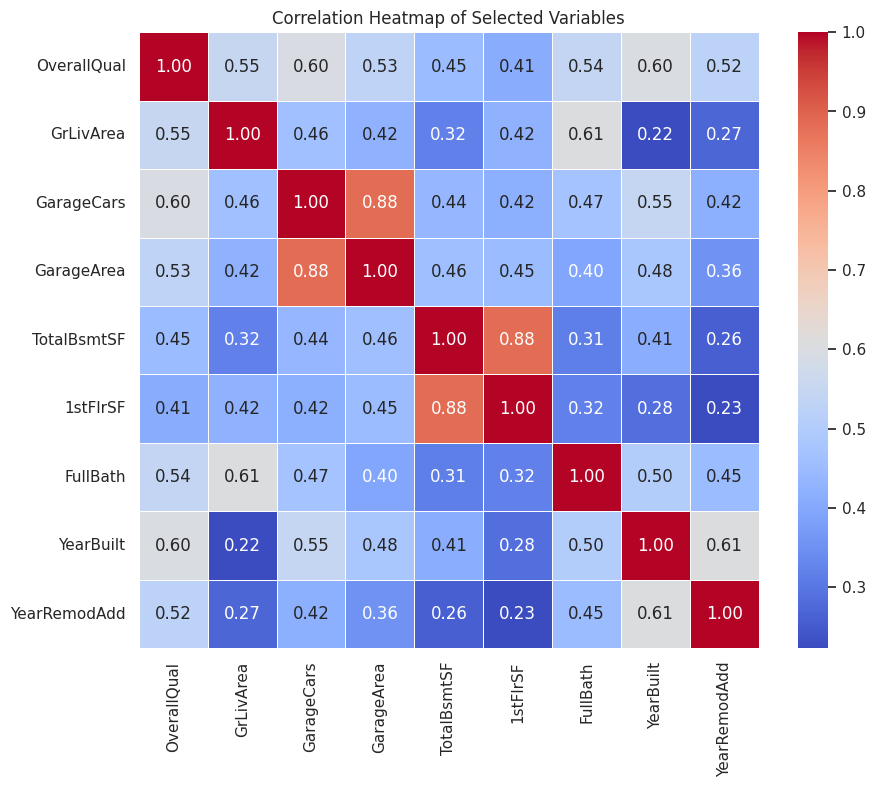

In [943]:
selected_variables = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
                       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

selected_data = new_train[selected_variables]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

#### 공분산성 높은 변수처리
-- 변수 합치기
- GarageSize
  - GarageCars, GarageArea
- TotalArea
 - 1stFlrSF, TotalBsmtSF
- LivArea
 - GrLivArea, FullBath
- Year
 - YearBuilt, YearRemodAdd

In [944]:
GarageSize = ['GarageCars', 'GarageArea']
TotalArea = ['1stFlrSF', 'TotalBsmtSF']
LivArea = ['GrLivArea','FullBath']
Year = ['YearBuilt', 'YearRemodAdd']

In [945]:
# GarageArea 선택.
# GarageCars은 범주형이기에 연속형이 더 이득이라고 판단.
print(new_train[GarageSize])
all_df = new_train.drop(['GarageCars'], axis=1)

      GarageCars  GarageArea
0              2         548
1              2         460
2              2         608
3              3         642
4              3         836
...          ...         ...
1454           2         400
1455           2         460
1457           1         252
1458           1         240
1459           1         276

[1324 rows x 2 columns]


In [948]:
# 두개 합치기
# 거의 동일한 모습을 보이므로 합침
print(new_train[TotalArea])
new_train['TotalArea']=new_train['1stFlrSF'] + new_train['TotalBsmtSF']
new_train = new_train.drop(['1stFlrSF', 'TotalBsmtSF'], axis=1)

      1stFlrSF  TotalBsmtSF
0          856          856
1         1262         1262
2          920          920
3          961          756
4         1145         1145
...        ...          ...
1454      1221         1221
1455       953          953
1457      1188         1152
1458      1078         1078
1459      1256         1256

[1324 rows x 2 columns]


In [946]:
# 범주형과 연속형으로 서로를 합하는것보다 곱하는것이 이득이라고 생각
print(new_train[LivArea])
new_train['LivArea']=  new_train['FullBath']*new_train['GrLivArea']
new_train = new_train.drop(['GrLivArea','FullBath'], axis=1)

      GrLivArea  FullBath
0          1710         2
1          1262         2
2          1786         2
3          1717         1
4          2198         2
...         ...       ...
1454       1221         2
1455       1647         2
1457       2340         2
1458       1078         1
1459       1256         1

[1324 rows x 2 columns]


In [947]:
# 서로 비슷하기에 최신자료인 YearRemodAdd 선택
print(new_train[Year])
new_train = new_train.drop(['YearBuilt'], axis=1)

      YearBuilt  YearRemodAdd
0          2003          2003
1          1976          1976
2          2001          2002
3          1915          1970
4          2000          2000
...         ...           ...
1454       2004          2005
1455       1999          2000
1457       1941          2006
1458       1950          1996
1459       1965          1965

[1324 rows x 2 columns]


####new_test도 new_train과 동일하게 선택

In [949]:
new_test = new_test.drop(['GarageCars'], axis=1)
new_test['TotalArea']=new_test['1stFlrSF'] + new_test['TotalBsmtSF']
new_test = new_test.drop(['1stFlrSF', 'TotalBsmtSF'], axis=1)
new_test['LivArea']=  new_test['FullBath']*new_test['GrLivArea']
new_test = new_test.drop(['GrLivArea','FullBath'], axis=1)
new_test = new_test.drop(['YearBuilt'], axis=1)

### 인코딩


#### 종속변수 분리 후 new_test, new_train 결합

In [950]:
# 각각 따로하고 싶었지만 2가지 이유가 있었다.
# 1. 현재 test가 train보다 크기가 크다.(최초의 자료가 50 : 50)
# 2. 각각 인코딩을 진행할시 서로간의 컬럼의 수가 맞지 않는다.
y = new_train['SalePrice'].reset_index(drop=True)
new_train.drop(['SalePrice'], axis = 1, inplace = True)
all_df = pd.concat([new_train, new_test]).reset_index(drop=True)

In [951]:
all_df = pd.get_dummies(all_df).reset_index(drop=True)
all_df.shape

(2783, 179)

### 머신러닝 평가


### 데이터셋 분리.

In [981]:
# 데이터를 train과 test로 다시 나누기위한 준비
X = all_df.iloc[:len(y), :]
new_test = all_df.iloc[len(y):, :]
X.shape, y.shape, new_test.shape

((1324, 179), (1324,), (1459, 179))

In [982]:
from sklearn.model_selection import train_test_split

# 위에서 만든 X로 test와 train을 분리.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((993, 179), (331, 179), (993,), (331,))

#### 선형 회귀 모델을 이용
- rmse를 이용하여 평가.

In [983]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)

r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

Root Mean Squared Error (RMSE): 0.0104
R-squared (R2): 0.8267


#### 모형 알고리즘 적용

In [973]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(random_state=0),
    GradientBoostingRegressor(random_state=0)
]


results = {}

for model in models:

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)

    r2 = r2_score(y_test, y_pred)

    results[model.__class__.__name__] = {'RMSE': rmse, 'R2': r2}

for model_name, metrics in results.items():
    print(f'{model_name}: RMSE = {metrics["RMSE"]:.4f}, R2 = {metrics["R2"]:.4f}')

LinearRegression: RMSE = 0.0104, R2 = 0.8267
DecisionTreeRegressor: RMSE = 0.0152, R2 = 0.6302
RandomForestRegressor: RMSE = 0.0100, R2 = 0.8416
GradientBoostingRegressor: RMSE = 0.0095, R2 = 0.8553


#### GradientBoostingRegressor가 제일 적절하게 나옴

In [978]:
gbr_model = GradientBoostingRegressor(random_state=0)

gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'GradientBoostingRegressor: RMSE = {rmse_gbr:.4f}, R2 = {r2_gbr:.4f}')

GradientBoostingRegressor: RMSE = 0.0095, R2 = 0.8553


#### 모형 시각화 & 최적의 모형 선택

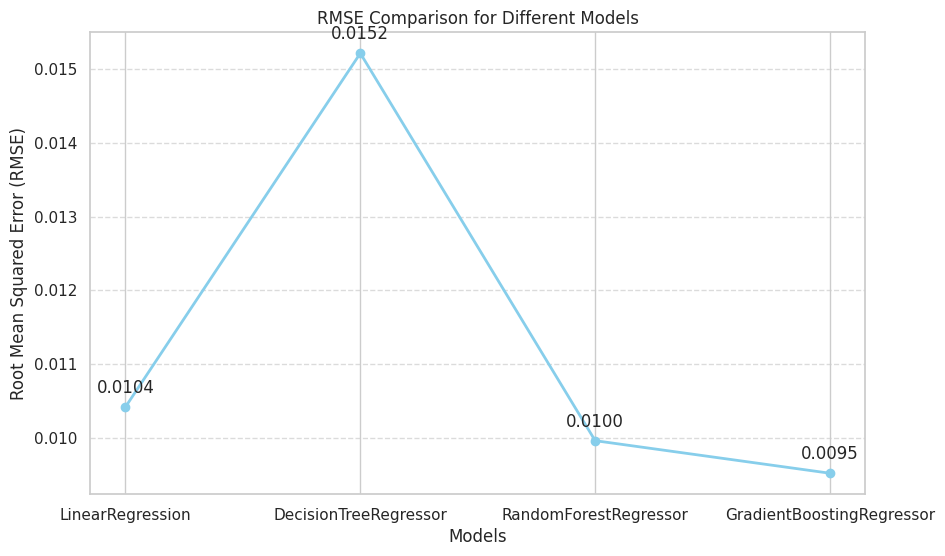

The best model is GradientBoostingRegressor with RMSE = 0.0095


In [974]:
model_names = list(results.keys())
rmse_values = [metrics['RMSE'] for metrics in results.values()]

plt.figure(figsize=(10, 6))
plt.plot(model_names, rmse_values, marker='o', color='skyblue', linestyle='-', linewidth=2)

for i, txt in enumerate(rmse_values):
    plt.annotate(f'{rmse_values[i]:.4f}', (model_names[i], rmse_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('RMSE Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

best_model_name = model_names[np.argmin(rmse_values)]
best_model = models[model_names.index(best_model_name)]

print(f'The best model is {best_model_name} with RMSE = {min(rmse_values):.4f}')

#### 혼합형 학습 적용

In [975]:
lr_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=0)
rf_model = RandomForestRegressor(random_state=0)
gbr_model = GradientBoostingRegressor(random_state=0)

lr_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

def blended_learning_predictions(X):
    blended_score = (0.3 * lr_model.predict(X)) + \
                    (0.1 * tree_model.predict(X)) + \
                    (0.3 * gbr_model.predict(X)) + \
                    (0.3 * rf_model.predict(X))
    return blended_score

blended_predictions = blended_learning_predictions(X_test)

blended_rmse = mean_squared_error(y_test, blended_predictions, squared=False)
blended_r2 = r2_score(y_test, blended_predictions)

print(f'Blended Model: RMSE = {blended_rmse:.4f}, R2 = {blended_r2:.4f}')

Blended Model: RMSE = 0.0094, R2 = 0.8585


#### 혼합형 학습시 RMSE = 0.0094가 나온다. 최적의 모델 선정.